### Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

### Downloading the dataset using kaggle api

In [1]:
!mkdir -p ~/.kaggle
!cp /Users/sudiptoray/Developer/LearnML/kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d giripujar/hr-analytics -p Datasets

Dataset URL: https://www.kaggle.com/datasets/giripujar/hr-analytics
License(s): CC0-1.0
100%|█████████████████████████████████████████| 111k/111k [00:00<00:00, 166kB/s]
100%|█████████████████████████████████████████| 111k/111k [00:00<00:00, 166kB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('Datasets/hr-analytics.zip', 'r')
zip_ref.extractall('Datasets')
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('Datasets/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Exploratory Data Analysis(EDA)

In [7]:
left=df[df.left==1]
left.shape

(3571, 10)

In [8]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [9]:
#Average numbers for all columns
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

1. **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
2. **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
3. **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

### Impact of salary on employee retention

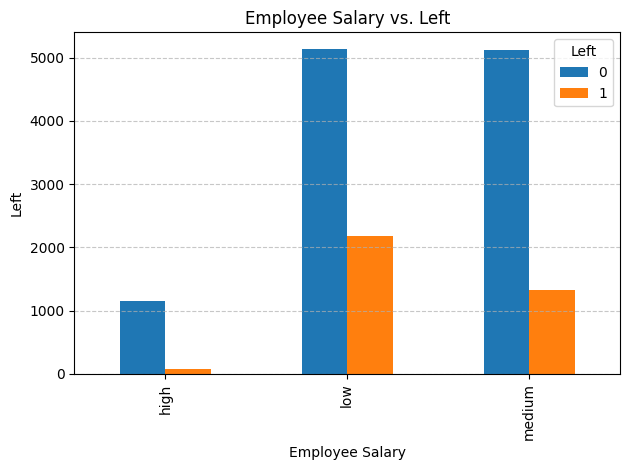

In [10]:
# Crosstab for salary vs left and Plot using matplotlib
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

# Add labels and title
plt.title('Employee Salary vs. Left')
plt.xlabel('Employee Salary')
plt.ylabel('Left')
plt.legend(title='Left', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Above bar chart shows employees with high salaries are likely to not leave the company

### Department wise employee retention rate

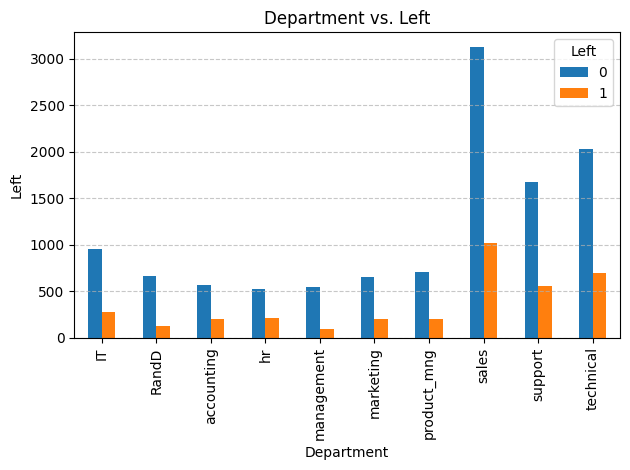

In [11]:
# Crosstab for Department vs left and Plot using matplotlib
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

# Add labels and title
plt.title('Department vs. Left')
plt.xlabel('Department')
plt.ylabel('Left')
plt.legend(title='Left', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**


In [12]:
subdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


### Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that.

In [13]:
salary_dummies=pd.get_dummies(subdf['salary'])
salary_dummies

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [14]:
df_with_dummies=pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


In [15]:
df_with_dummies.drop(['salary'],axis='columns',inplace=True)
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,False,True,False
14995,0.37,160,0,False,True,False
14996,0.37,143,0,False,True,False
14997,0.11,280,0,False,True,False


In [16]:
X = df_with_dummies
X

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,False,True,False
14995,0.37,160,0,False,True,False
14996,0.37,143,0,False,True,False
14997,0.11,280,0,False,True,False


In [17]:
y = df.left

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [20]:
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(4500,))

In [22]:
model.score(X_test,y_test)

0.7675555555555555